In [13]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [37]:

def intensity(arr):
  #  calcluates intensity of a pixel from 0 to 9
  mini = 999
  maxi = 0
  for i in range(len(arr)):
    for j in range(len(arr[0])):
      maxi = max(arr[i][j],maxi)
      mini = min(arr[i][j],mini)
  level = float(float(maxi-mini)/float(10));
  brr = [[0]*len(arr[0]) for i in range(len(arr))]
  for i in range(10):
    l1 = mini+level*i
    l2 = l1+level
    for j in range(len(arr)):
      for k in range(len(arr[0])):
        if(arr[j][k] >= l1 and arr[j][k] <= l2):
          brr[j][k]=i
  return brr

def patterning(image):
    # based on the intensity maps pixel to the corresponding block of 3*3  
    #  ---   ---   ---   -X-   -XX   -XX   -XX   -XX   XXX   XXX
    #  ---   -X-   -XX   -XX   -XX   -XX   XXX   XXX   XXX   XXX
    #  ---   ---   ---   ---   ---   -X-   -X-   XX-   XX-   XXX
    #  9     8     7     6     5     4     3     2     1     0  
    #  X = 0
    #  - = 255
    #  Therefore intensity 0 being the blackest block.
  arr = np.asarray(image)
  brr=intensity(arr)
  gray_level = [[[0,0,0],[0,0,0],[0,0,0]] for i in range(33)]

  gray_level[0] = [[0,0,0],[0,0,0],[0,0,0]];
  gray_level[1] = [[0,255,0],[0,0,0],[0,0,0]];
  gray_level[2] = [[0,255,0],[0,0,0],[0,0,255]];
  gray_level[3] = [[255,255,0],[0,0,0],[0,0,255]];
  gray_level[4] = [[255,255,0],[0,0,0],[255,0,255]];
  gray_level[5] = [[255,255,255],[0,0,0],[255,0,255]];
  gray_level[6] = [[255,255,255],[0,0,255],[255,0,255]];
  gray_level[7] = [[255,255,255],[0,0,255],[255,255,255]];
  gray_level[8] = [[255,255,255],[255,0,255],[255,255,255]];
  gray_level[9] = [[255,255,255],[255,255,255],[255,255,255]];
  crr = np.zeros((len(arr)*3,len(arr[0])*3))
  cnt=0
  for i in range(len(brr)):
    cnt+=1
    for j in range(len(brr[i])):
      new_i = i+2*(i-1)
      new_j = j+2*(j-1)
      for k in range(3):
        for l in range(3):
          crr[new_i+k][new_j+l] = gray_level[brr[i][j]][k][l]
  return crr



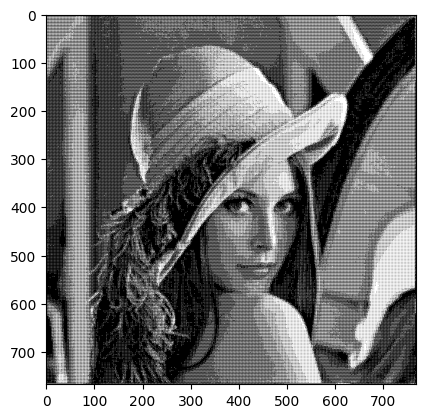

In [38]:
img4 = cv2.imread('/content/lena1.tif')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
plt.imshow(patterning(img4),cmap='gray')